# Overview
- Identify what patterns in data will be useful for modeling through visual plotting
- Identify which data is sparse and not necessary in the dataset; this information can be eliminated before moving onto the modeling step
- Identify which data could contribute to the following labels: chance of disease outbreak, proximity to adequate healthcare resources
- Preparing the dataset to merge on the year key if the modeling team would like that (we will have all data segmentations merged for the modeling team as an option)

For each notebook
- General visualizations (scatters, bar)
- Correlations (Heatmaps)
- Distribution graphs (Histograms)
- Geographical maps
- Time Series Analysis
- Z-test for Hypothesis Testing
- Chi-Squared Test for Hypothesis Testing with Categorical Information


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import geopy
import matplotlib.pyplot as plt

In [44]:
combined_dt = pd.read_csv('combined_cases_2018_2019_2024.csv', sep = ',')
indicator_dt = pd.read_csv('disease_indicators.csv', sep=',')

## Combined Cases Dataset

In [4]:
combined_dt.head()


,state,year,disease,cases,deaths
0,Al Jazirah,2018,Acute Tonsillitis,16,0
1,Al Qadarif,2018,Acute Tonsillitis,27,0
2,Blue Nile,2018,Acute Tonsillitis,18,0
3,Central Darfur,2018,Acute Tonsillitis,2,0
4,East Darfur,2018,Acute Tonsillitis,2,0


In [5]:
combined_dt.info()
combined_dt.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   state    344 non-null    object
 1   year     344 non-null    int64 
 2   disease  344 non-null    object
 3   cases    344 non-null    int64 
 4   deaths   344 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 13.6+ KB


,year,cases,deaths
count,344.000000,344.000000,344.000000
mean,2019.238372,221.566860,4.197674
std,2.145205,1134.227938,28.018765
min,2018.000000,0.000000,0.000000
25%,2018.000000,1.000000,0.000000
50%,2018.000000,13.000000,0.000000
75%,2019.000000,43.250000,0.000000
max,2024.000000,11627.000000,317.000000


## Look at combined cases data
Notes:
- looks like Al Jazirah misnamed as 'Aj Jazirah' for 2019, assuming that to be correct & updated CSV file

In [6]:
num_cols = ['year', 'cases', 'deaths']
cat_cols = ['state', 'disease']

## Numerical Distributions

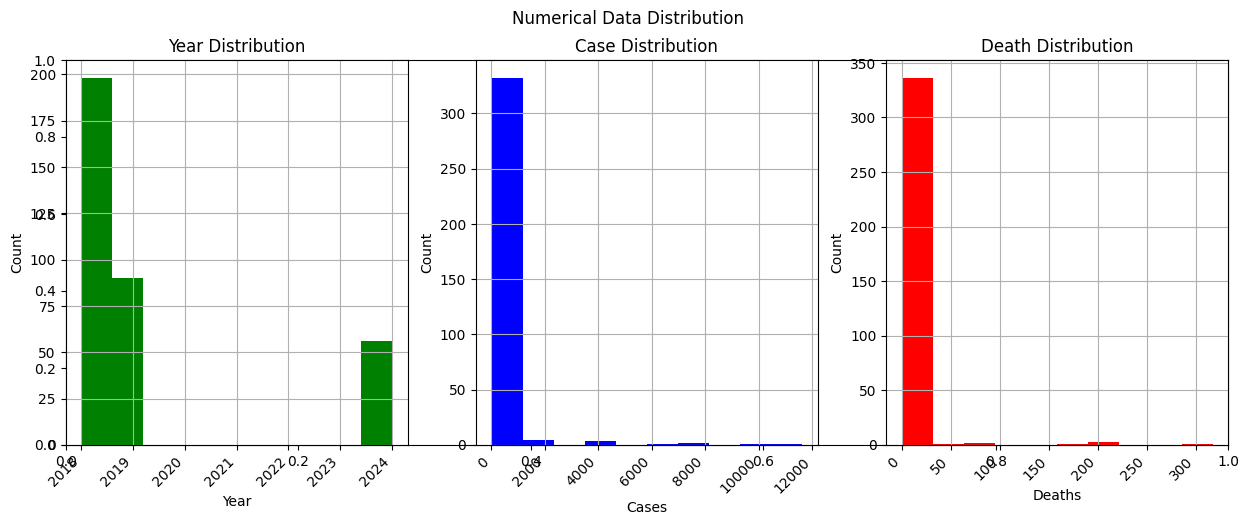

In [7]:
# just want to look at a quick histogram of all the numeric columns and see the distributions
fig, ax = plt.subplots(figsize=(15,5))
plt.suptitle('Numerical Data Distribution')
plt.subplot(1, 3, 1)
plt.hist(combined_dt['year'], color='green')
plt.xlabel('Year')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Year Distribution')
plt.grid("on")

plt.subplot(1, 3, 2)
plt.hist(combined_dt['cases'], color='blue')
plt.xlabel('Cases')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Case Distribution')
plt.grid("on")

plt.subplot(1, 3, 3)
plt.hist(combined_dt['deaths'], color='red')
plt.xlabel('Deaths')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Death Distribution')
plt.grid("on")

plt.show()

## Categorical Distributions

<function matplotlib.pyplot.show(close=None, block=None)>

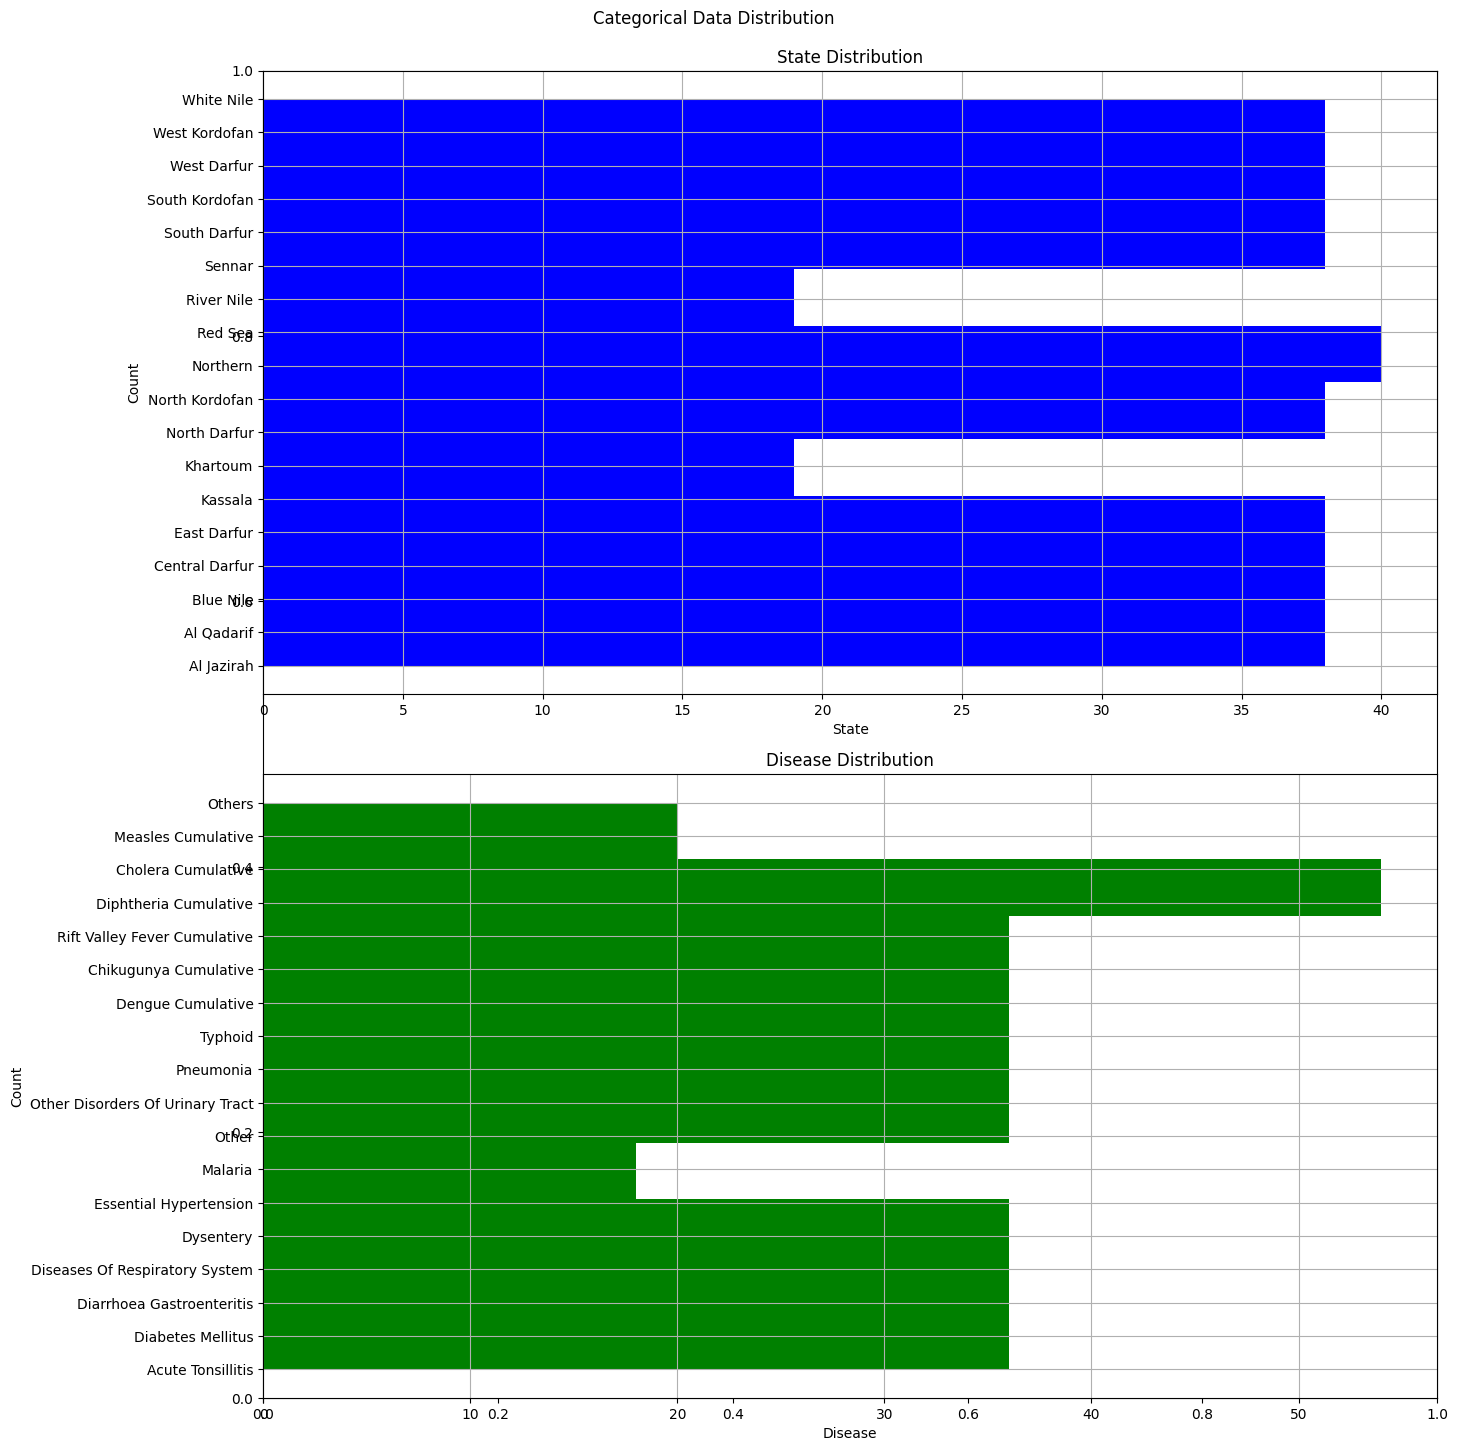

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
plt.suptitle('Categorical Data Distribution')
plt.subplot(2, 1, 1)
plt.hist(combined_dt['state'], color='blue', orientation='horizontal')
plt.xlabel('State')
# plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('State Distribution')
plt.grid("on")

plt.subplot(2, 1, 2)
plt.hist(combined_dt['disease'], color='green', orientation='horizontal')
plt.xlabel('Disease')
# plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Disease Distribution')
plt.grid("on")
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show

## Numeric Correlations

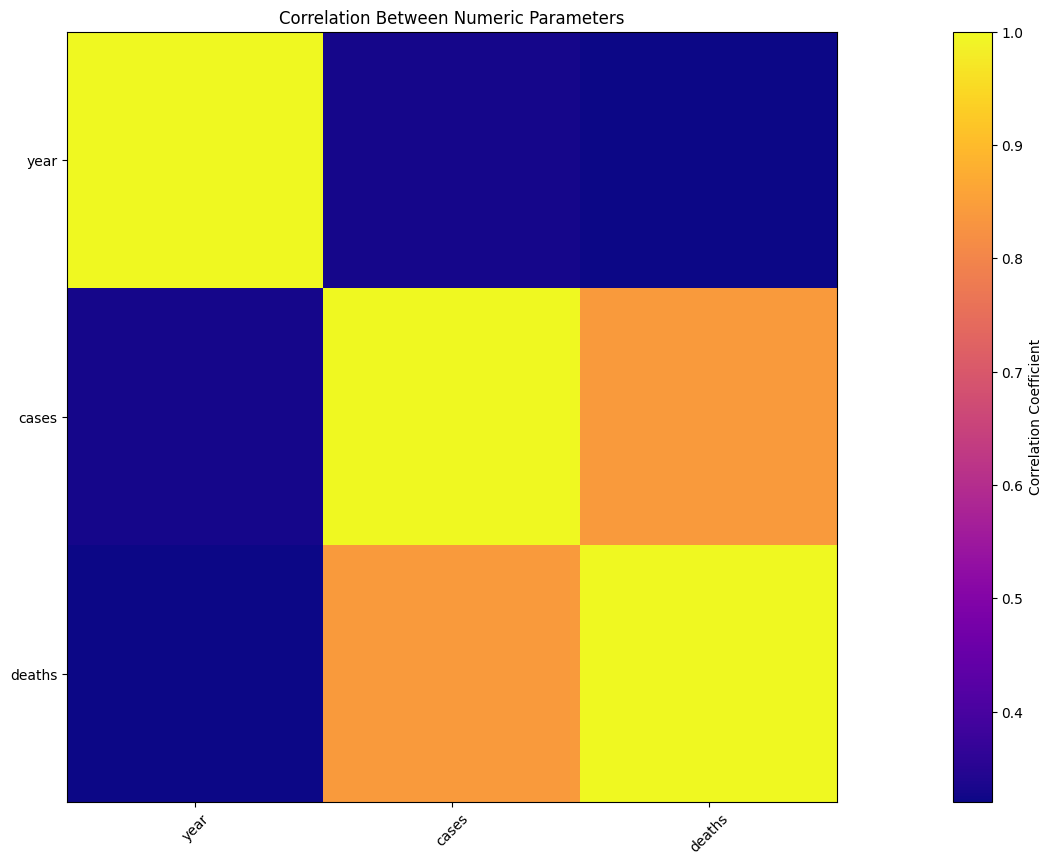

In [9]:
corr_matrix = combined_dt[num_cols].corr()
# visualize correlation matrix so it's easier to figure out what might be related
plt.figure(figsize=(30, 10))
plt.imshow(corr_matrix, cmap='plasma', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Between Numeric Parameters')
plt.show()

## Data by Location

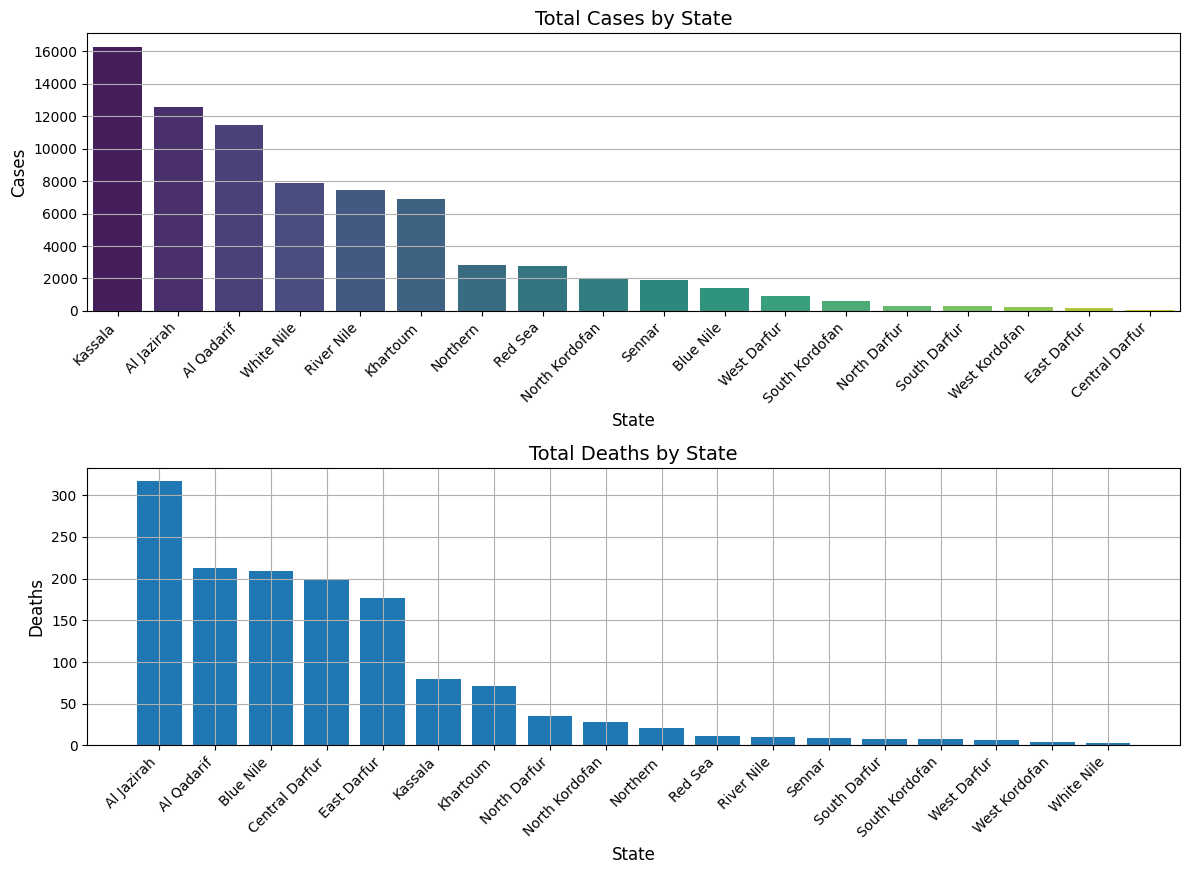

In [10]:
# Aggregate cases by state
cases_by_state = combined_dt.groupby('state')['cases'].sum().reset_index().sort_values(by='cases', ascending=False)
# cases_by_state

# Plot
plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.grid('on')
sns.barplot(data=cases_by_state, x='state', y='cases', hue='state', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Total Cases by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Cases', fontsize=12)

plt.subplot(3, 1, 2)
plt.bar(x=combined_dt['state'], height=combined_dt['deaths'].sort_values(ascending=False))
plt.xticks(rotation=45, ha='right')
plt.title('Total Deaths by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Deaths', fontsize=12)
plt.grid('on')
plt.tight_layout()
plt.show()

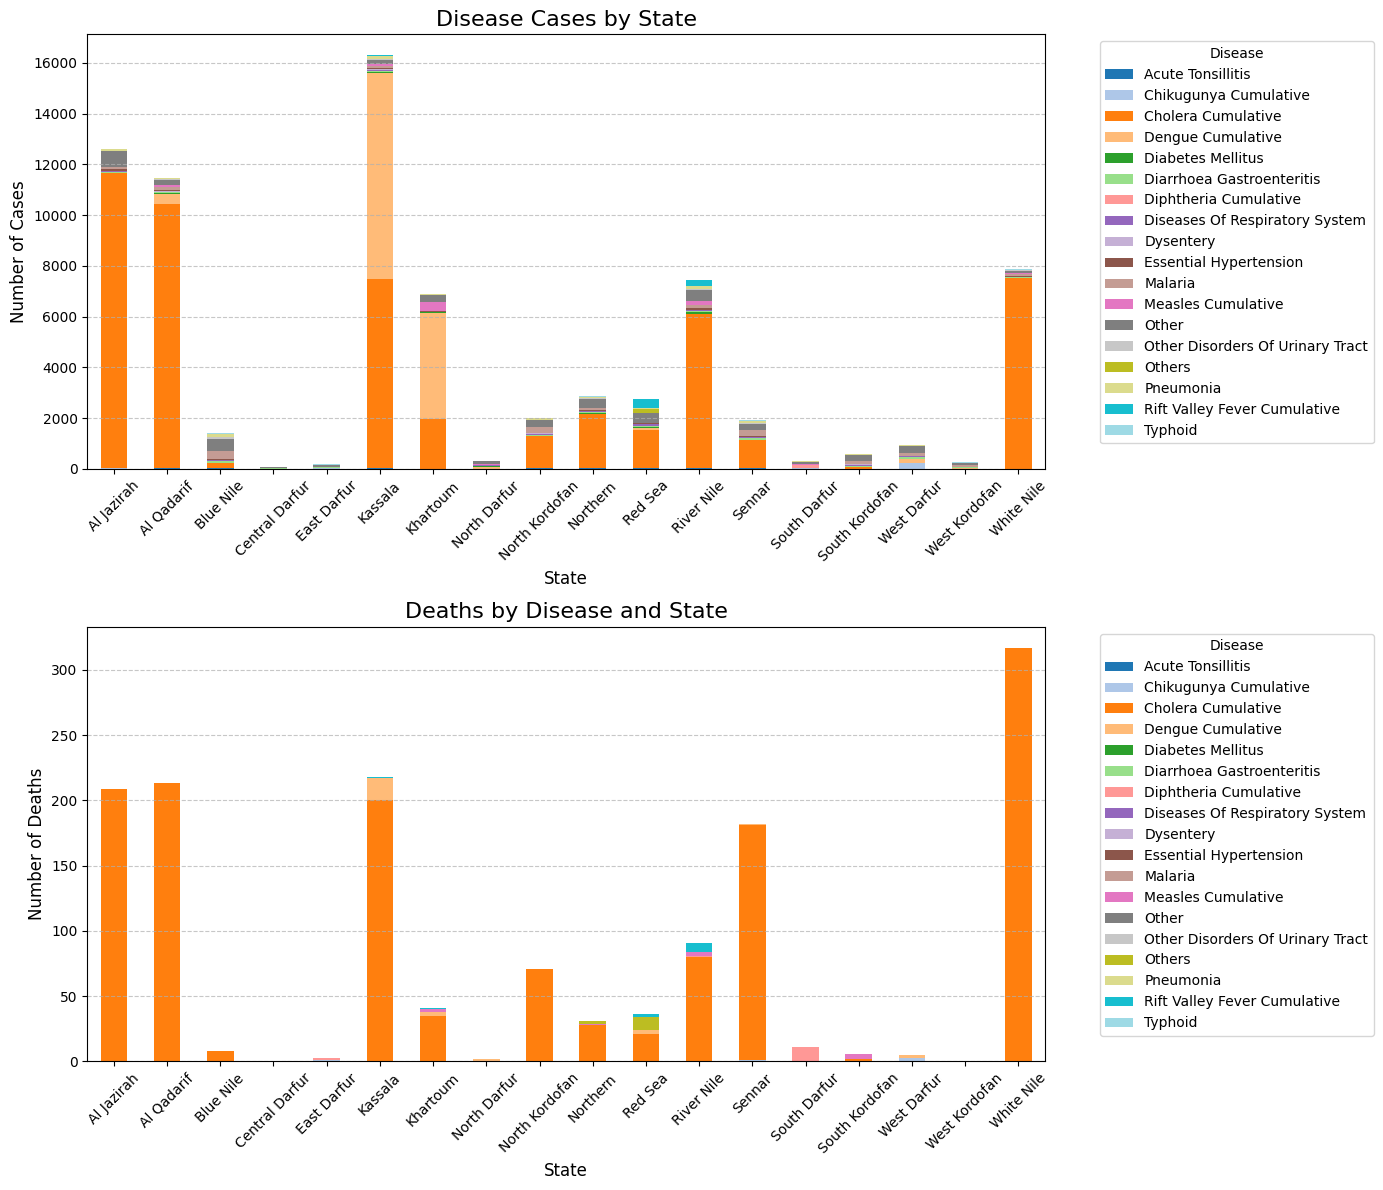

In [64]:
import matplotlib.pyplot as plt

# Grouping by state and disease
disease_state = combined_dt.groupby(['state', 'disease'])['cases'].sum().reset_index()
death_state = combined_dt.groupby(['state', 'disease'])['deaths'].sum().reset_index()

# Create the subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12))  # Larger figure size for clarity

# Plotting the first subplot for Disease Cases
pivot_df_disease = disease_state.pivot(index='state', columns='disease', values='cases')
pivot_df_disease.plot(kind='bar', stacked=True, cmap='tab20', ax=axes[0])

axes[0].set_title('Disease Cases by State', fontsize=16)
axes[0].set_ylabel('Number of Cases', fontsize=12)
axes[0].set_xlabel('State', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Disease', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7)

# Plotting the second subplot for Deaths
pivot_df_death = death_state.pivot(index='state', columns='disease', values='deaths')
pivot_df_death.plot(kind='bar', stacked=True, cmap='tab20', ax=axes[1])

axes[1].set_title('Deaths by Disease and State', fontsize=16)
axes[1].set_ylabel('Number of Deaths', fontsize=12)
axes[1].set_xlabel('State', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Disease', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()


# Indicator dataset

In [11]:
indicator_dt.head()

,GHO (CODE),YEAR (DISPLAY),STARTYEAR,ENDYEAR,DIMENSION (TYPE),DIMENSION (CODE),DIMENSION (NAME),Numeric,Low,High
0,MALARIA_CONF_CASES,2020,2020,2020,NaN,NaN,NaN,1698394.00,0.00,0.00
1,MALARIA_EST_MORTALITY,2021,2021,2021,NaN,NaN,NaN,16.19,5.75,34.16
2,MALARIA_EST_MORTALITY,2014,2014,2014,NaN,NaN,NaN,9.01,3.88,15.78
3,MALARIA_SUSPECTS,2017,2017,2017,NaN,NaN,NaN,3691112.00,0.00,0.00
4,MALARIA_EST_MORTALITY,2012,2012,2012,NaN,NaN,NaN,7.71,3.36,13.28


In [12]:
indicator_dt.describe()

,YEAR (DISPLAY),STARTYEAR,ENDYEAR,Numeric,Low,High
count,4965.000000,4965.000000,4965.000000,4.654000e+03,4965.000000,4965.000000
mean,2006.855388,2006.852568,2006.855388,5.580419e+04,1039.507994,3327.646731
std,11.171563,11.168623,11.171563,4.520914e+05,5406.402223,17710.843512
min,1961.000000,1961.000000,1961.000000,0.000000e+00,0.000000,0.000000
25%,2000.000000,2000.000000,2000.000000,2.900000e+00,0.100000,0.360000
50%,2009.000000,2009.000000,2009.000000,1.135000e+01,3.600000,10.020000
75%,2016.000000,2016.000000,2016.000000,2.946750e+01,11.930000,25.780000
max,2024.000000,2024.000000,2024.000000,9.760505e+06,70537.800000,223150.900000
